In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Membaca dataset
data_nilai = pd.read_csv('Sample Nilai Alumni Prodi Informatika_Ver1.csv')
data_profesi = pd.read_csv('Sample Profesi Pekerjaan Alumni Prodi Informatika Universitas Gunadarma_Ver1.csv')

In [3]:
data_nilai.head(10)

,NPM,KDMK,NAMA MK,JENIS,SKS,NILAI
0,51417061,AK045210,KONSEP DATA MINING,P,2,A
1,51417061,AK045223,PENGANTAR SISTEM TERDISTRIBUSI,P,2,A
2,51417061,AK045215,PEMROGRAMAN MULTIMEDIA,P,2,A
3,50414234,AK045308,JARINGAN KOMPUTER,U,3,A
4,50414234,IT045238,MATEMATIKA DASAR 2,U,2,A


In [6]:
data_profesi.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer
5,51414049,ANDI MUHADIR AMIN,3.19,Mobile App Developer
6,51414092,ANDINITA NURUL HIDAYAH,3.57,Software Quality Engineer
7,51414196,ANGGA ELVIN PRATAMA,3.31,Data Engineer
8,51414598,ARIF RACHMAN,3.32,Graphic Designer
9,51414845,AUNI RACHMAN,3.20,Software Quality Assurance


In [9]:
# Remove the columns 'KDMK' and 'JENIS' from the 'nilai_alumni' dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['KDMK', 'JENIS'])


In [10]:
# Merge the two datasets based on 'NPM' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi, nilai_alumni_cleaned, on='NPM', how='inner')

In [11]:
# Perform one-hot encoding on the 'NAMA MK' column
merged_data_encoded = pd.get_dummies(merged_data, columns=['NAMA MK'])

In [12]:
merged_data_encoded.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,SKS,NILAI,NAMA MK_ALGORITMA & PEMROGRAMAN 1,NAMA MK_ALGORITMA & PEMROGRAMAN 2,NAMA MK_ALGORITMA & PEMROGRAMAN 3,NAMA MK_ALGORITMA DAN PEMROGRAMAN 1,...,NAMA MK_SKRIPSI / EVALUASI KOMPREHENSIF,NAMA MK_SKRIPSI/EVALUASI KOMPREHENSIF,NAMA MK_STATISTIKA 1,NAMA MK_STATISTIKA 2,NAMA MK_STRUKTUR DATA,NAMA MK_TEKNIK KOMPILASI,NAMA MK_TEKNOLOGI KECERDASAN ARTIFICIAL,NAMA MK_TEORI BAHASA DAN OTOMATA,NAMA MK_TERAPAN TEORI GRAF,NAMA MK_TUGAS AKHIR/ SKRIPSI/ STUDI KOMPREHENSIF
0,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,3,A,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,2,A,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,2,A,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,3,B,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,2,B,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,3,B,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,1,A,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,2,B,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,2,A,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,50414234,ADI NUGRAHA YUNANDA,3.3,Software Engineer,3,B,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# To reduce duplication, we will group by 'NPM', 'Nama Lengkap', 'IPK', 'Klasifikasi Profesi', and sum the one-hot encoded columns.
# For the 'SKS' and 'NILAI' columns, we can aggregate them as well, for example, by summing or taking the mean.

# We will exclude 'SKS' and 'NILAI' from grouping, and sum all the one-hot encoded columns
# For 'SKS' and 'NILAI', we can take the mean as an example to reduce duplicates

# Grouping the data
merged_data_reduced = merged_data_encoded.groupby(
    ['NPM', 'Nama Lengkap', 'IPK', 'Klasifikasi Profesi']
).agg({
    'SKS': 'mean', 
    'NILAI': lambda x: ', '.join(x),  # join grades for now
    **{col: 'sum' for col in merged_data_encoded.columns if col.startswith('NAMA MK_')}
}).reset_index()

# Display the cleaned and grouped dataset
merged_data_reduced.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,SKS,NILAI,NAMA MK_ALGORITMA & PEMROGRAMAN 1,NAMA MK_ALGORITMA & PEMROGRAMAN 2,NAMA MK_ALGORITMA & PEMROGRAMAN 3,NAMA MK_ALGORITMA DAN PEMROGRAMAN 1,...,NAMA MK_SKRIPSI / EVALUASI KOMPREHENSIF,NAMA MK_SKRIPSI/EVALUASI KOMPREHENSIF,NAMA MK_STATISTIKA 1,NAMA MK_STATISTIKA 2,NAMA MK_STRUKTUR DATA,NAMA MK_TEKNIK KOMPILASI,NAMA MK_TEKNOLOGI KECERDASAN ARTIFICIAL,NAMA MK_TEORI BAHASA DAN OTOMATA,NAMA MK_TERAPAN TEORI GRAF,NAMA MK_TUGAS AKHIR/ SKRIPSI/ STUDI KOMPREHENSIF
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer,1.962025,"A, A, A, B, B, B, A, B, A, B, B, C, A, B, B, A...",1,1,1,0,...,1,0,1,1,1,1,0,1,0,0
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer,1.962025,"A, A, A, A, B, B, B, B, B, B, B, B, B, B, B, B...",1,1,1,0,...,1,0,1,1,1,1,0,1,0,0
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst,1.962025,"A, A, A, A, A, A, A, B, B, B, B, B, B, A, B, A...",1,1,1,0,...,1,0,1,1,1,1,0,1,0,0
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer,1.962025,"B, B, B, B, B, B, B, A, A, A, B, C, B, A, B, A...",1,1,1,0,...,1,0,1,1,1,1,0,1,0,0
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer,1.960526,"A, B, B, A, A, A, A, B, B, A, A, A, B, A, A, A...",1,1,1,0,...,0,1,1,1,1,1,0,1,0,0
5,50415185,ADITYA MAHFUZHA,3.29,IT Project Manager,1.962025,"A, A, A, A, B, B, B, B, B, B, B, B, B, B, B, B...",0,1,1,1,...,1,0,1,1,1,1,0,1,0,0
6,50415335,AHMAD FURQAN,3.36,Network Engineer,1.962025,"A, A, A, A, A, A, A, A, B, B, B, B, B, B, B, B...",0,1,1,1,...,1,0,1,1,1,1,0,1,0,0
7,50415370,AHMAD SYUKRON,3.67,Software Quality Assurance,1.960526,"B, A, B, A, A, A, A, A, A, B, A, B, A, B, B, A...",0,1,1,1,...,0,1,1,1,1,1,0,1,0,0
8,50415582,ALVIN RAMADHANI,3.43,Mobile App Developer,1.962025,"A, A, A, B, B, B, B, B, A, A, A, B, B, A, A, A...",0,1,1,1,...,1,0,1,1,1,1,0,1,0,0
9,50415780,ANGGER RIDHO ABDULLAH,3.09,Software Engineer,1.962025,"A, A, A, A, A, A, B, B, B, B, B, B, B, B, B, B...",0,1,1,1,...,1,0,1,1,1,1,0,1,0,0


In [14]:
# Let's create a mapping for the grades to convert them into numeric values for calculating a GPA-like score.
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0}

# We need to convert the "NILAI" column to numeric based on this mapping. Since the column contains multiple grades, we will:
# 1. Split the grades for each student.
# 2. Convert each grade to its corresponding numeric value.
# 3. Calculate the mean for each student.

# Function to map grades to numeric values and calculate the average
def calculate_average_grade(grades):
    grade_list = grades.split(', ')
    numeric_grades = [grade_mapping[grade] for grade in grade_list if grade in grade_mapping]
    return sum(numeric_grades) / len(numeric_grades) if numeric_grades else None

# Apply the function to the "NILAI" column
merged_data_reduced['Average Grade'] = merged_data_reduced['NILAI'].apply(calculate_average_grade)

# Now we can drop the original "NILAI" column since we have calculated the average
merged_data_reduced_cleaned = merged_data_reduced.drop(columns=['NILAI'])

# Display the final cleaned data with average grades
merged_data_reduced_cleaned.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi,SKS,NAMA MK_ALGORITMA & PEMROGRAMAN 1,NAMA MK_ALGORITMA & PEMROGRAMAN 2,NAMA MK_ALGORITMA & PEMROGRAMAN 3,NAMA MK_ALGORITMA DAN PEMROGRAMAN 1,NAMA MK_ALGORITMA DAN PEMROGRAMAN 1A,...,NAMA MK_SKRIPSI/EVALUASI KOMPREHENSIF,NAMA MK_STATISTIKA 1,NAMA MK_STATISTIKA 2,NAMA MK_STRUKTUR DATA,NAMA MK_TEKNIK KOMPILASI,NAMA MK_TEKNOLOGI KECERDASAN ARTIFICIAL,NAMA MK_TEORI BAHASA DAN OTOMATA,NAMA MK_TERAPAN TEORI GRAF,NAMA MK_TUGAS AKHIR/ SKRIPSI/ STUDI KOMPREHENSIF,Average Grade
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer,1.962025,1,1,1,0,0,...,0,1,1,1,1,0,1,0,0,3.316456
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer,1.962025,1,1,1,0,0,...,0,1,1,1,1,0,1,0,0,3.037975
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst,1.962025,1,1,1,0,0,...,0,1,1,1,1,0,1,0,0,3.240506
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer,1.962025,1,1,1,0,0,...,0,1,1,1,1,0,1,0,0,3.405063
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer,1.960526,1,1,1,0,0,...,1,1,1,1,1,0,1,0,0,3.710526
5,50415185,ADITYA MAHFUZHA,3.29,IT Project Manager,1.962025,0,1,1,1,0,...,0,1,1,1,1,0,1,0,0,3.303797
6,50415335,AHMAD FURQAN,3.36,Network Engineer,1.962025,0,1,1,1,0,...,0,1,1,1,1,0,1,0,0,3.303797
7,50415370,AHMAD SYUKRON,3.67,Software Quality Assurance,1.960526,0,1,1,1,0,...,1,1,1,1,1,0,1,0,0,3.657895
8,50415582,ALVIN RAMADHANI,3.43,Mobile App Developer,1.962025,0,1,1,1,0,...,0,1,1,1,1,0,1,0,0,3.455696
9,50415780,ANGGER RIDHO ABDULLAH,3.09,Software Engineer,1.962025,0,1,1,1,0,...,0,1,1,1,1,0,1,0,0,3.075949


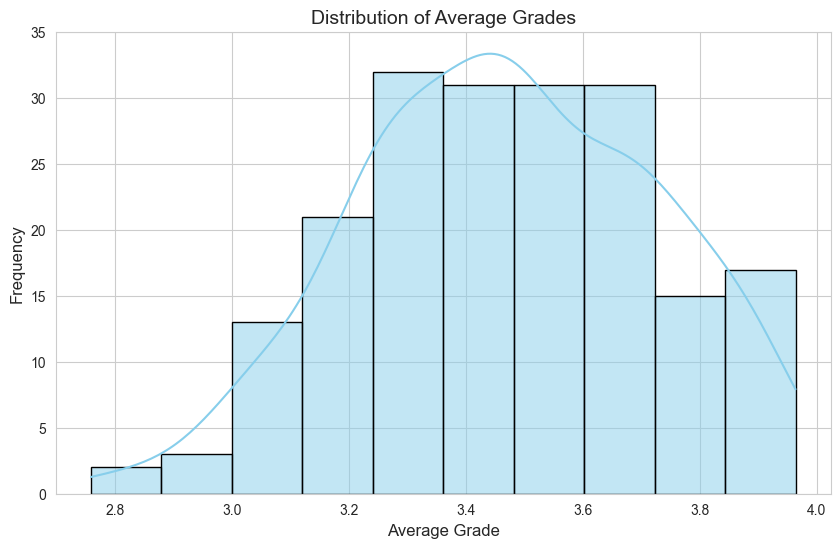

In [16]:
# Set the style for Seaborn
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data_reduced_cleaned, x='Average Grade', bins=10, kde=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Average Grades', fontsize=14)
plt.xlabel('Average Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


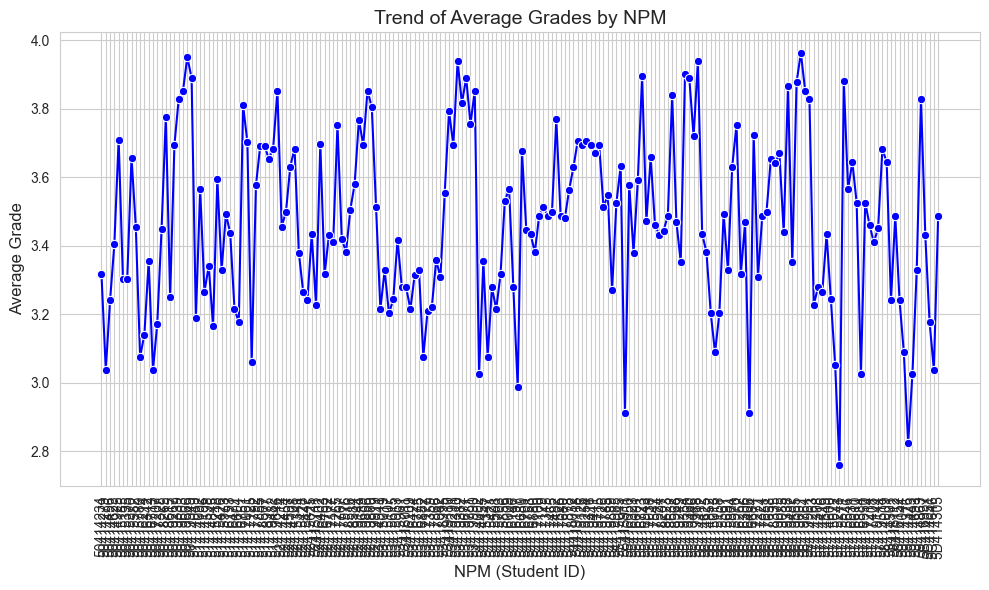

In [17]:
# Set the style for Seaborn
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data_reduced_cleaned, x='NPM', y='Average Grade', marker='o', color='b')

# Customize the plot
plt.title('Trend of Average Grades by NPM', fontsize=14)
plt.xlabel('NPM (Student ID)', fontsize=12)
plt.ylabel('Average Grade', fontsize=12)
plt.xticks(rotation=90)  # Rotate the NPM labels for better readability

# Show the plot
plt.tight_layout()
plt.show()